<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/FeatureEngineering/Text/1_Capturing_text_complexity_in_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this recipe, we are going to capture text complexity by creating very simple features that:

- count the number of characters
- count the number of words in the text
- count the number of unique words
- determine the lexical diversity
- determine the average word size

In [0]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

In [13]:
# load text data
data = fetch_20newsgroups(subset='train')
df = pd.DataFrame(data.data, columns=['text'])
df.head()

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


## Counting number of characters

In [14]:
df['num_char'] = df['text'].str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1120


In [15]:
# same but removing trailing white spaces
df['num_char'] = df['text'].str.strip().str.len()

df.head()

,text,num_char
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117


## Counting number of words

In [16]:
df['num_words'] = df['text'].str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


In [17]:
# same but removing trailing white spaces
df['num_words'] = df['text'].str.strip().str.split().str.len()

df.head()

,text,num_char,num_words
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171


## Determine vocabulary

In [18]:
df['num_vocab'] = df['text'].str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,96
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,103
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,220
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,97
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,140


In [19]:
# setting charaters to lower case before counting unique words

df['num_vocab'] = df['text'].str.lower().str.split().apply(set).str.len()

df.head()

,text,num_char,num_words,num_vocab
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139


## Lexical diversity

In [20]:
df['lexical_div'] = df['num_words'] / df['num_vocab']

df.head()

,text,num_char,num_words,num_vocab,lexical_div
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216


## Average words length

In [21]:
df['ave_word_length'] = df['num_char'] / df['num_words']

df.head()

,text,num_char,num_words,num_vocab,lexical_div,ave_word_length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,716,123,93,1.322581,5.821138
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,857,123,99,1.242424,6.967480
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,1980,339,219,1.547945,5.840708
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,814,113,96,1.177083,7.203540
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,1117,171,139,1.230216,6.532164


## There is more...

Let's explore how the distribution of the created features varies across the different topics the text refers to.

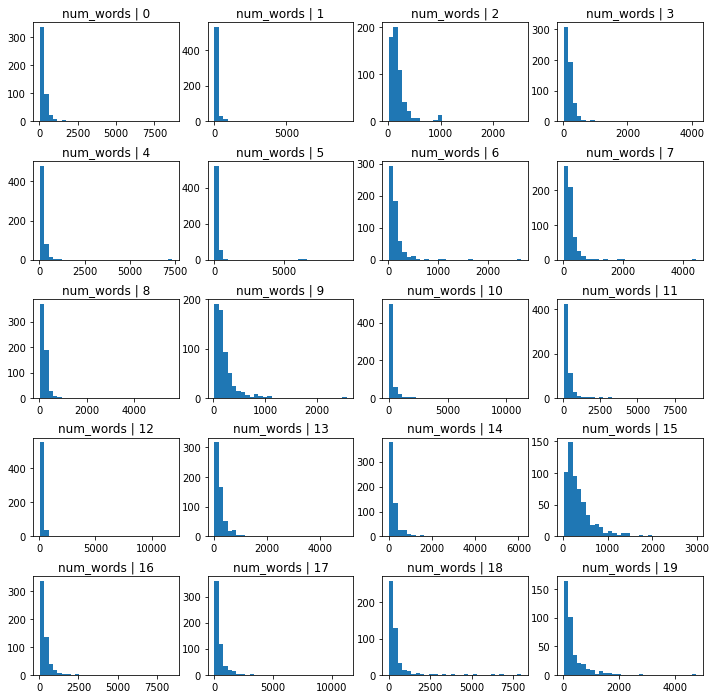

In [22]:
import matplotlib.pyplot as plt

df['target'] = data.target

def plot_features(df, text_var):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].hist(df[df.target==n][text_var], bins=30)
            axs[i, j].set_title(text_var + ' | ' + str(n))
            n += 1
    plt.show()
    
plot_features(df, 'num_words')